In [1]:
import random
import functions
from sklearn import preprocessing
test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
#         test_row = int(round(test_row * 10))
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

## SVM

In [3]:
import numpy as np
x = np.array(train_matrix)
x = preprocessing.scale(x) # normalize
y = np.array(train_label)
x_test = np.array(test_matrix)
x_test = preprocessing.scale(x_test) # normalize

In [4]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

### rbf kernel

In [6]:
from sklearn import svm
gamma = np.linspace(0.0000001, 0.01, 200)
error = []
for i in gamma:
    clf = svm.SVR(kernel = 'rbf', C = 1e3, gamma = float(i))
    error.append(cross_val(x, y, clf))
print('min error with rbf kernel:', min(error))

min error with rbf kernel: 0.3940609734177538


min error: 0.3940609734177538
gamma when at min error: 5.035075376884423e-05


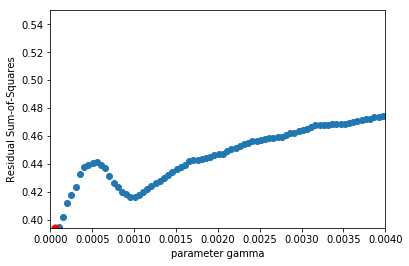

In [8]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('gamma when at min error:', gamma[error.index(min(error))])
plt.scatter(gamma, error)
plt.xlim((0.0000001, 0.004))
plt.ylim(min(error), 0.55)
plt.xlabel('parameter gamma')
plt.ylabel('Residual Sum-of-Squares')
plt.scatter(gamma[error.index(min(error))], min(error), c = 'r', s = 50)
plt.show()

In [9]:
from sklearn.metrics import r2_score
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
clf = svm.SVR(kernel = 'rbf', C = 1e3, gamma = gamma[error.index(min(error))])
accuracy = []
for train_index, test_index in index:
    clf.fit(x[train_index], y[train_index]) # train
    y_pred = clf.predict(x[test_index]) # predict
    accuracy.append(r2_score(y_pred, y[test_index]))
print("accuracy:", sum(accuracy)/len(accuracy))   

accuracy: 0.6697066403253864


### linear kernel

In [10]:
C = np.linspace(0.001, 1.5, 100)
error = []
for i in C:
    clf = svm.SVR(kernel = 'linear', C = i)
    error.append(cross_val(x, y, clf))

min error: 0.3893441994470935
C when at min error: 0.03128282828282829


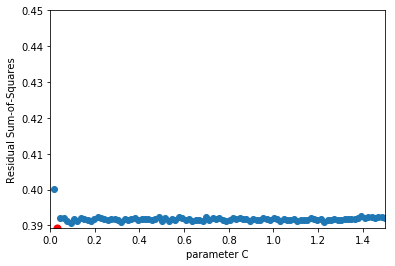

In [11]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('C when at min error:', C[error.index(min(error))])
plt.scatter(C, error)
plt.xlim((0.001, 1.5))
plt.ylim((min(error), 0.45))
plt.xlabel('parameter C')
plt.ylabel('Residual Sum-of-Squares')
plt.scatter(C[error.index(min(error))], min(error), c = 'r', s = 50)
plt.show()

In [12]:
from sklearn.metrics import r2_score
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
clf = svm.SVR(kernel = 'linear', C = C[error.index(min(error))])
accuracy = []
for train_index, test_index in index:
    clf.fit(x[train_index], y[train_index]) # train
    y_pred = clf.predict(x[test_index]) # predict
    accuracy.append(r2_score(y_pred, y[test_index]))
print("accuracy:", sum(accuracy)/len(accuracy))   

0.6620266457889976


### poly kernel

In [22]:
degree = np.linspace(0, 12, 13)
error = []
for i in degree:
    clf = svm.SVR(kernel = 'poly', C = 1e6, degree = i, gamma = 0.000001)
    error.append(cross_val(x, y, clf))
print('min error with poly kernel:', min(error))

min error with poly kernel: 0.4416105454806588


min error: 0.4416105454806588
degree when at min error: 1.0


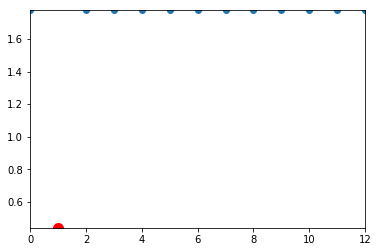

In [23]:
print('min error:', min(error))
print('degree when at min error:', degree[error.index(min(error))])
plt.scatter(degree, error)
plt.xlim((0, 12))
plt.ylim((min(error), max(error)))
plt.scatter(degree[error.index(min(error))], min(error), c = 'r', s = 100)
plt.show()

In [15]:
from sklearn.metrics import r2_score
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
clf = svm.SVR(kernel = 'poly', C = 1e6, degree = degree[error.index(min(error))], gamma = 0.000001)
accuracy = []
for train_index, test_index in index:
    clf.fit(x[train_index], y[train_index]) # train
    y_pred = clf.predict(x[test_index]) # predict
    accuracy.append(r2_score(y_pred, y[test_index]))
print("accuracy:", sum(accuracy)/len(accuracy))  

0.6597955382988313
